In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import plotly.express as px

In [2]:
try:
    df=sns.load_dataset('iris')
    print('✅ Your Dataset Loaded Successfully')
except:
        print("❌ Your Dataset is not Loaded Succesfully")

✅ Your Dataset Loaded Successfully


In [3]:
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [4]:
fig_1=px.box(df,x='sepal_length')
fig_1.show()

In [5]:
fig_1=px.box(df,x='sepal_width')
fig_1.show()

In [6]:
fig_1=px.violin(df,x='petal_length')
fig_1.show()

In [7]:
fig_1=px.area(df,x='petal_width')
fig_1.show()

In [8]:
from sklearn.compose import ColumnTransformer,make_column_selector as selector
from sklearn.model_selection import train_test_split,GridSearchCV,RandomizedSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

num=Pipeline([
    ('scaler',StandardScaler())
])
preprocessor=ColumnTransformer([
    ('num_scaler',num,selector(dtype_include=['number']))


])
preprocessor

,transformers,"[('num_scaler', ...)]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True
,force_int_remainder_cols,'deprecated'
,copy,True
,with_mean,True
,with_std,True


In [9]:
X=df.drop('species',axis=1)
y=df['species']

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)




In [10]:
from sklearn.ensemble import RandomForestClassifier
model=Pipeline([
    ('preprocessor',preprocessor),
    ('model',RandomForestClassifier())



])

param_grid = {
    'model__n_estimators': [50, 100, 200],
    'model__max_depth': [5, 10, 20],
    'model__max_features': ['sqrt'],
    'model__min_samples_split': [5],
    'model__min_samples_leaf': [5]
}


cv = GridSearchCV(
    estimator=model,
    param_grid=param_grid,
    scoring='accuracy',
    verbose=1,
    n_jobs=3
)



cv.fit(X_train,y_train)
y_pred=cv.predict(X_test)

Fitting 5 folds for each of 9 candidates, totalling 45 fits


In [16]:
model

,steps,"[('preprocessor', ...), ('model', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('num_scaler', ...)]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


In [11]:
y_test

73     versicolor
18         setosa
118     virginica
78     versicolor
76     versicolor
31         setosa
64     versicolor
141     virginica
68     versicolor
82     versicolor
110     virginica
12         setosa
36         setosa
9          setosa
19         setosa
56     versicolor
104     virginica
69     versicolor
55     versicolor
132     virginica
29         setosa
127     virginica
26         setosa
128     virginica
131     virginica
145     virginica
108     virginica
143     virginica
45         setosa
30         setosa
Name: species, dtype: object

In [12]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,precision_score,f1_score,recall_score

print('Accuracy Score',accuracy_score(y_test,y_pred))
print('Precision Score',precision_score(y_test,y_pred,average='micro'))
print('Recall Score',recall_score(y_test,y_pred,average='micro'))
print('F1 Score',f1_score(y_test,y_pred,average='micro'))
print('Confusion Matrix ',confusion_matrix(y_test,y_pred))
print('\nClassification Report\n ',classification_report(y_test,y_pred))

Accuracy Score 1.0
Precision Score 1.0
Recall Score 1.0
F1 Score 1.0
Confusion Matrix  [[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]

Classification Report
                precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00         9
   virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



Text(70.72222222222221, 0.5, 'Actual')

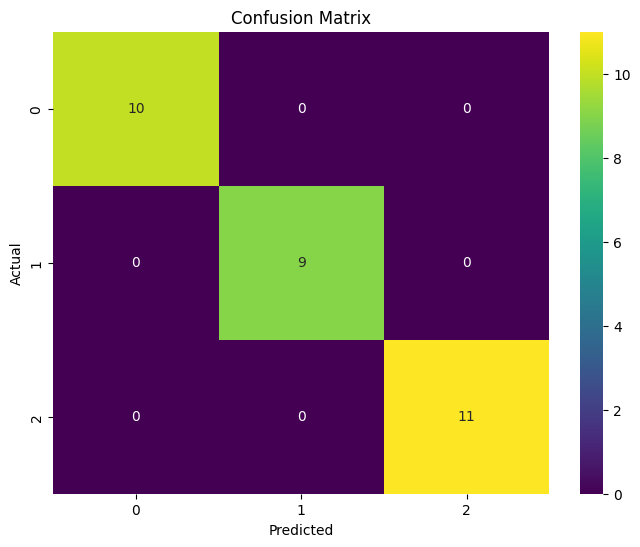

In [13]:
cm=confusion_matrix(y_test,y_pred)
plt.figure(figsize=(8,6))

sns.heatmap(cm,annot=True,cmap='viridis')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')


In [14]:
import joblib
joblib.dump(model, "RandomForestClassifier.pkl")

['RandomForestClassifier.pkl']